# Main Notebook

## Import Functions

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from uszipcode import SearchEngine
from IPython.display import Image
import time
import math

# Data Prep / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Linear Regression w/ l2 norm (Ridge)
from linear_reg import lr_gridsearch
from sklearn.linear_model import Ridge

# Random Forest
from random_forest import rf_train, feat_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Feature importance
from sklearn.inspection import permutation_importance

import joblib

## Import Data

In [2]:
df_X = pd.read_csv('.\Data\df_X_OLD.csv')
df_y = pd.read_csv('.\Data\df_y.csv')
df = pd.read_csv('.\Data\df_original_OLD.csv')
X = df_X.to_numpy()
y = df_y.to_numpy()

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize X
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# extract list of feature names
features = df_X.columns.tolist()

# init list to store best models
models = []

In [24]:
# # Just Cutting it off to the first 2 features 
# X = X[:,:2]
# features = features[:2]

# X.shape
print(len(df_X))
print(len(df))

263840
263840


# ML
## Linear Regression

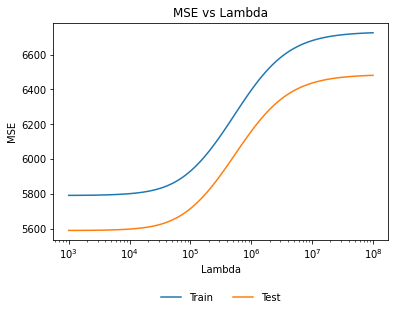

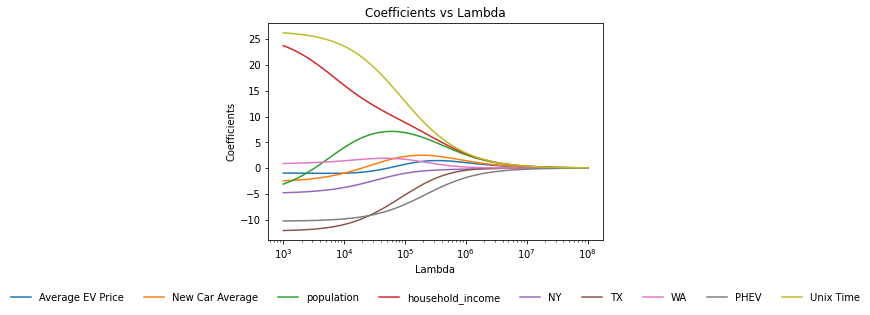

['Models/model_lr.joblib']

In [3]:
model_lr, lmbd, MSE_lr = lr_gridsearch(Ridge, X_train, X_test, y_train, y_test, features)
models.append(model_lr)

# Save the trained model to the models folder
joblib.dump(model_lr, 'Models/model_lr.joblib')

In [7]:
df

,State,ZIP Code,Registration Date,Drivetrain Type,Vehicle Count,Average EV Price,New Car Average,population,household_income
0,TX,75001,2019-11-01,PHEV,2,"$54,669","$38,747",15418,8404
1,TX,75001,2020-01-01,PHEV,9,"$54,669","$38,747",15418,8404
2,TX,75001,2020-02-01,BEV,4,"$56,326","$38,550",15418,8404
3,TX,75001,2020-04-01,BEV,6,"$57,757","$39,904",15418,8404
4,TX,75001,2020-05-01,PHEV,9,"$58,863","$39,138",15418,8404
...,...,...,...,...,...,...,...,...,...
263835,NY,14905,2023-01-01,PHEV,9,"$58,725","$49,388",8330,3686
263836,NY,14905,2023-02-01,BEV,2,"$58,385","$48,763",8330,3686
263837,NY,14905,2023-02-01,PHEV,3,"$58,385","$48,763",8330,3686
263838,NY,14905,2023-03-01,BEV,1,"$54,669","$38,747",8330,3686


## Random Forest

In [4]:
# random forest wants 1d array
model_rf = rf_train(X_train, y_train.flatten())
models.append(model_rf)
# Save the trained model to the models folder
joblib.dump(model_rf, 'Models/model_rf.joblib')

Initial default model time =  194.19778275489807
CV model time =  818.3272457122803
Optimal model time =  57.84245014190674


['Models/model_rf.joblib']

In [ ]:
#feat_importance(model_rf, X_train, y_train, features)

# By County

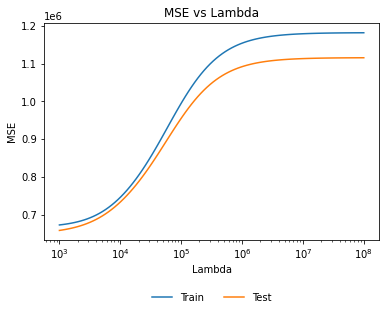

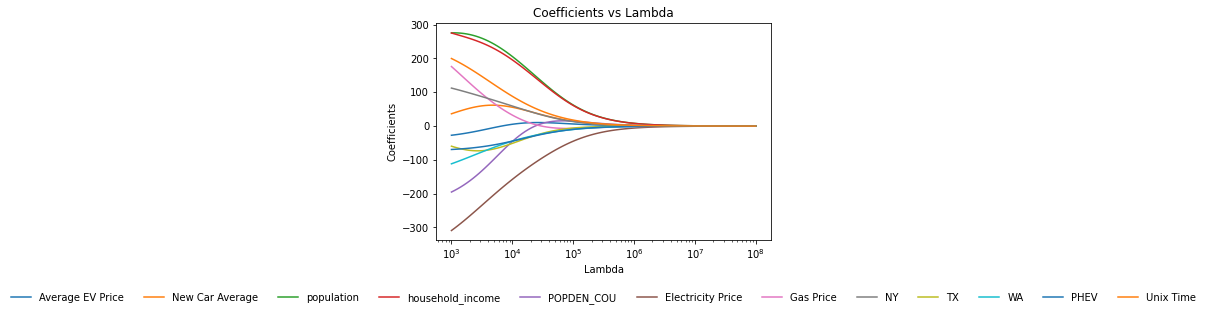

KeyboardInterrupt: 

In [40]:
df_X = pd.read_csv('.\Data\df_X_county.csv')
df_y = pd.read_csv('.\Data\df_y_county.csv')
df_X = df_X.drop(columns = 'Unnamed: 0')
df_y = df_y.drop(columns = 'Unnamed: 0')
#df = pd.read_csv('.\Data\df_original.csv')
X = df_X.to_numpy()
y = df_y.to_numpy()

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize X
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# extract list of feature names
features = df_X.columns.tolist()

# init list to store best models
models2 = []

model_lr2, lmbd, MSE_lr = lr_gridsearch(Ridge, X_train, X_test, y_train, y_test, features)
models2.append(model_lr2)

# Save the trained model to the models folder
joblib.dump(model_lr2, 'Models/model_lr2.joblib')

# random forest wants 1d array
model_rf2 = rf_train(X_train, y_train.flatten())
models2.append(model_rf2)

# Save the trained model to the models folder
joblib.dump(model_rf2, 'Models/model_rf2.joblib')

In [39]:
model_rf = joblib.load('Models/model_rf2.joblib')

Elapsed time to compute the importances: 0.062 seconds
Elapsed time to compute the importances: 29.032 seconds


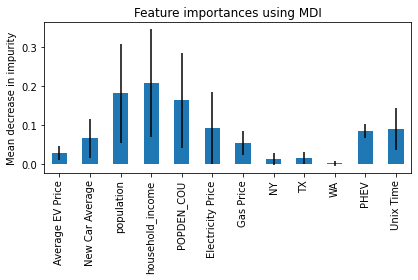

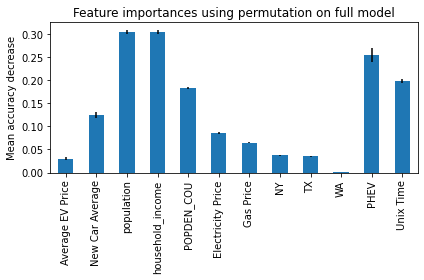

In [41]:
feat_importance(model_rf, X_train, y_train, features)